## Loan Prediction Project Machine Learning

---

### 1. Problem Statement

1. Tujuan: memprediksi Loan_Status (Y/N) untuk aplikasi pinjaman berdasarkan fitur demografis & finansial.

2. Output: model klasifikasi biner. iya = 1, tidak = 0. disetujui = 1, tidak disetujui = 0

### 2. Data Collection
1. Menggunakan dataset dari kaggle : https://www.kaggle.com/datasets/ninzaami/loan-predication?resource=download



| **Nama Kolom**        | **Tipe Data**      | **Penjelasan**                                                                                                          |
| --------------------- | ------------------ | ----------------------------------------------------------------------------------------------------------------------- |
| **Loan_ID**           | Object/String      | ID unik untuk setiap pengajuan pinjaman (hanya sebagai identifier, tidak berpengaruh pada prediksi).                    |
| **Gender**            | Kategori           | Jenis kelamin pemohon pinjaman. Nilai: `Male`, `Female`.                                                                |
| **Married**           | Kategori           | Status pernikahan pemohon. Nilai: `Yes`, `No`.                                                                          |
| **Dependents**        | Kategori → Numerik | Jumlah tanggungan pemohon (anak atau keluarga yang ditanggung). Bisa bernilai `0`, `1`, `2`, `3+`.                      |
| **Education**         | Kategori           | Tingkat pendidikan pemohon. Nilai: `Graduate` (lulusan perguruan tinggi) atau `Not Graduate`.                           |
| **Self_Employed**     | Kategori           | Status pekerjaan pemohon. Nilai: `Yes` (wiraswasta) atau `No` (pegawai).                                                |
| **ApplicantIncome**   | Numerik (int)      | Pendapatan bulanan pemohon (dalam satuan moneter, biasanya ribuan).                                                     |
| **CoapplicantIncome** | Numerik (float)    | Pendapatan tambahan dari pemohon bersama (misalnya pasangan/anggota keluarga yang ikut apply).                          |
| **LoanAmount**        | Numerik (float)    | Jumlah pinjaman yang diajukan (biasanya dalam ribuan).                                                                  |
| **Loan_Amount_Term**  | Numerik (float)    | Lama pinjaman dalam hitungan bulan (misalnya 360 = 30 tahun).                                                           |
| **Credit_History**    | Numerik (float)    | Riwayat kredit pemohon. Nilai: `1.0` (riwayat kredit baik), `0.0` (riwayat kredit buruk), atau kosong (tidak ada data). |
| **Property_Area**     | Kategori           | Lokasi properti yang akan dibiayai. Nilai: `Urban`, `Semiurban`, `Rural`.                                               |
| **Loan_Status**       | Kategori (Target)  | Status persetujuan pinjaman. Nilai: `Y` (disetujui), `N` (tidak disetujui).                                             |


---

### Loan Prediction Machine Learning Implemented

### 1. Data Preparation

In [53]:
# 1. Import library
# buat load data table
import pandas as pd
# data visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
# untuk data preprocessing dan splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Models machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 2. Load dataset
df = pd.read_csv("loan.csv")

In [54]:
# EDA (Exploratory Data Analysis)
# Lihat 5 data teratas
print(df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [55]:
# Info dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [56]:
# Statistik deskriptif
print(df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [57]:
# Cek missing values
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


### 2. EDA atau Data Visualisasi

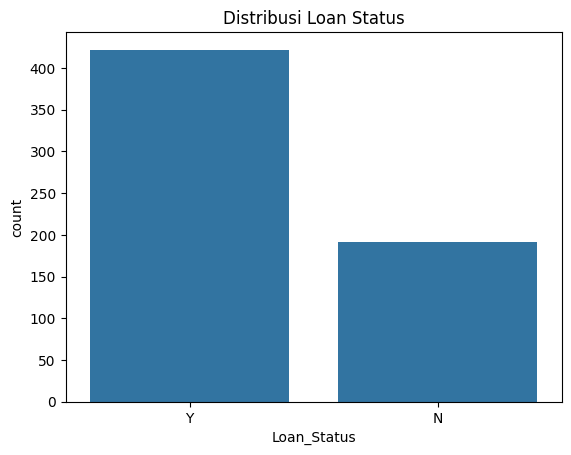

In [58]:
# DATA VISUALISASI
sns.countplot(x="Loan_Status", data=df)
plt.title("Distribusi Loan Status")
plt.show()

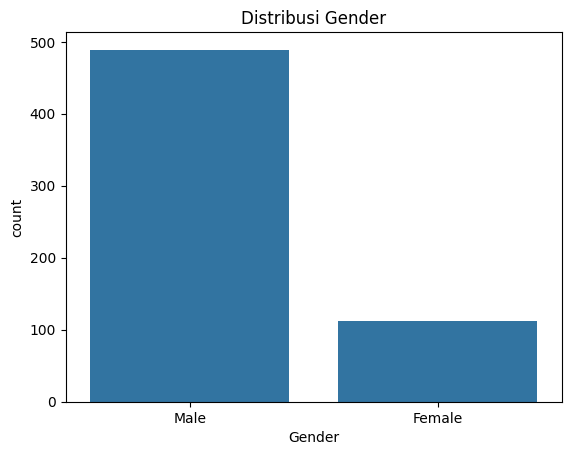

In [59]:
# Distribusi Gender
sns.countplot(x="Gender", data=df)
plt.title("Distribusi Gender")
plt.show()

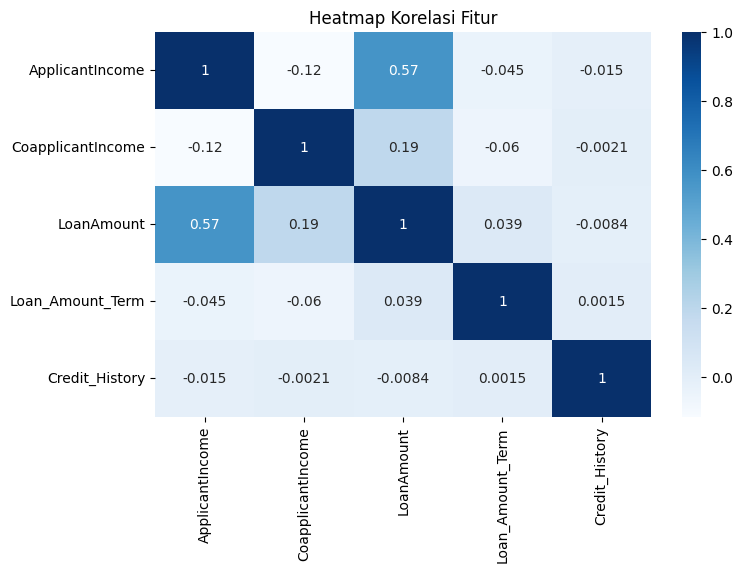

In [60]:
# Korelasi antar fitur numerik
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Heatmap Korelasi Fitur")
plt.show()

Dari EDA ini kita bisa tau:

- Banyak data missing (misal di kolom Gender, LoanAmount, dll).

- Loan disetujui (Y) lebih banyak daripada ditolak (N).

- ApplicantIncome & LoanAmount punya pengaruh terhadap approval.

### 3. Data Cleaning + Feature Engineering

In [61]:
# Isi missing values
df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)
df.fillna(method="ffill", inplace=True)

C:\Users\Vanya\AppData\Local\Temp\ipykernel_20148\201538261.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LoanAmount"].fillna(df["LoanAmount"].median(), inplace=True)
C:\Users\Vanya\AppData\Local\Temp\ipykernel_20148\201538261.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [62]:
# Buat fitur baru
# Feature Engineering
# total income itu gabungan dari kolom orang yg minjem duit + orang yg ngikut minjem duit juga
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
# gabungan dari total income si peminjam = berapa yang dipinjam + total gajian si peminjam(diri sendiri / keluarga/temen)
df["Loan_Income_Ratio"] = df["LoanAmount"] / df["Total_Income"]

df["Income_Level"] = pd.cut(
    df["Total_Income"],
    # disini dia bikin kategori gtu 
    # 0 low, 2500 medium, 6000 high, 10k very high
    bins=[0, 2500, 6000, 10000, df["Total_Income"].max()],
    labels=["Low", "Medium", "High", "Very High"]
)

In [63]:
# Encode Income_Level agar tidak string
# kita mengubah le_income menjadi vektor atau numerik
le_income = LabelEncoder()
df["Income_Level"] = le_income.fit_transform(df["Income_Level"].astype(str))

In [64]:
# Encode kategori
# string jadi numerik
le = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col])

print("\nDataset setelah feature engineering:")
print(df.head())


Dataset setelah feature engineering:
   Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        0           0          0              0   
1        1       1        1           1          0              0   
2        2       1        1           0          0              1   
3        3       1        1           0          1              0   
4        4       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  Total_Income  \
0             1.0              2            1        5849

### 4. Data Splitting

In [65]:
# X sebagai input feature dan y sebagai output atau hasil prediksinya
# kita harus memastikan mana X untuk input feature dan y untuk output atau target
X = df.drop(columns=["Loan_ID", "Loan_Status"])
y = df["Loan_Status"]

In [66]:
# DATA SPLITTING 80% Data Train : 20% Data test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [67]:
print("\nJumlah data train:", X_train.shape)
print("Jumlah data test:", X_test.shape)


Jumlah data train: (491, 14)
Jumlah data test: (123, 14)


### 5. Modelling dan Evaluasi Model

In [68]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    # support vector machine
    "SVM": SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n=== {name} ===")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))

d:\laragon\bin\python\python-3.13\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== Logistic Regression ===
Accuracy: 0.7886178861788617
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


=== Decision Tree ===
Accuracy: 0.6991869918699187
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.49      0.53        43
           1       0.75      0.81      0.78        80

    accuracy                           0.70       123
   macro avg       0.67      0.65      0.66       123
weighted avg       0.69      0.70      0.69       123


=== Random Forest ===
Accuracy: 0.7967479674796748
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.53      0.65        43
   

d:\laragon\bin\python\python-3.13\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\laragon\bin\python\python-3.13\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\laragon\bin\python\python-3.13\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Simpan hasil evaluasi dalam list
eval_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    eval_results.append([name, acc, prec, rec, f1])

# Buat DataFrame hasil evaluasi
results_df = pd.DataFrame(eval_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

results_df

d:\laragon\bin\python\python-3.13\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.788618,0.759615,0.9875,0.858696
1,Decision Tree,0.691057,0.762500,0.7625,0.762500
2,Random Forest,0.788618,0.781250,0.9375,0.852273
3,SVM,0.650407,0.650407,1.0000,0.788177


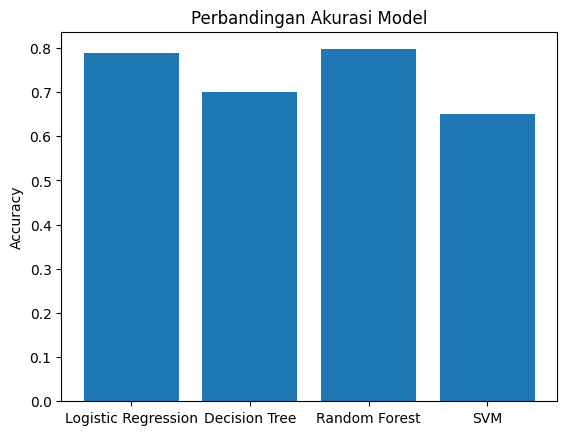

In [70]:
# Evaluasi Model dalam bentuk barplot
plt.bar(results.keys(), results.values())
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Accuracy")
plt.show()

d:\laragon\bin\python\python-3.13\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


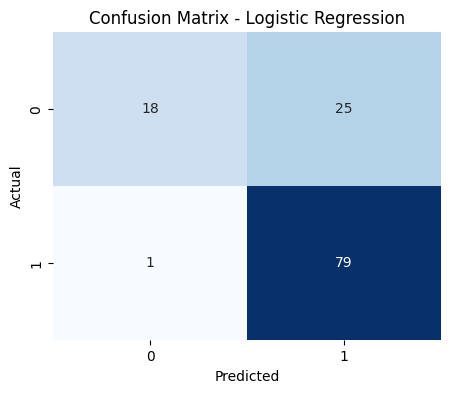

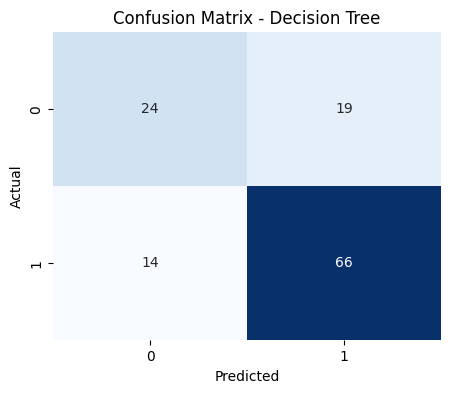

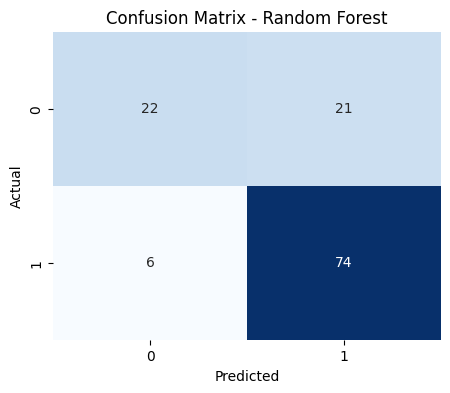

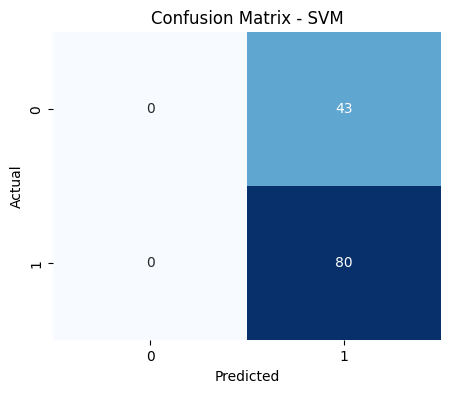

In [ ]:
# Confusion Matrix untuk tiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

# y_test itu target yg asli, y_pred target yang diprediksi kan
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


### Implementasi Data baru menggunakan Random Forest untuk Loan Prediction

In [ ]:
new_data = pd.DataFrame({
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [2000],
    'LoanAmount': [150],
    'Loan_Amount_Term': [360], #isi bulan kek 5 bulan 10 bulan
    'Credit_History': [1],
    'Gender': [1],         # 1 = Male, 0 = Female
    'Married': [1],        # 1 = Married
    'Dependents': [0],     # 0 dependents
    'Education': [0],      # 0 = Graduate
    'Self_Employed': [0],  # 0 = No
    'Property_Area': [2]   # 2 = Urban
})

In [73]:
# === Feature Engineering sama kayak training ===
new_data['Total_Income'] = new_data['ApplicantIncome'] + new_data['CoapplicantIncome']
new_data['Loan_Income_Ratio'] = new_data['LoanAmount'] / new_data['Total_Income']
new_data['Income_Level'] = pd.cut(
    new_data['Total_Income'],
    bins=[0,2500,4000,6000,81000],
    labels=['Low','Average','High','Very High']
)

In [74]:
# Pastikan sama urutan kolomnya kayak X_train
new_data = pd.get_dummies(new_data)
new_data = new_data.reindex(columns=X_train.columns, fill_value=0)

In [75]:
# Prediksi
prediction = models["Random Forest"].predict(new_data)
print("Hasil Prediksi:", "Disetujui" if prediction[0] == 1 else "Ditolak")

Hasil Prediksi: Disetujui


In [76]:
# Probabilitas
proba = models["Random Forest"].predict_proba(new_data)
print("Probabilitas Ditolak:", proba[0][0])
print("Probabilitas Disetujui:", proba[0][1])

Probabilitas Ditolak: 0.1
Probabilitas Disetujui: 0.9
